In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import os
import pickle
import PIL
import numpy as np
import cv2

Using TensorFlow backend.


In [2]:
batch_size = 64
num_classes = 10
epochs = 7

X_train_mnist = open("X_train_mnist.pickle","rb")
y_train_mnist = open("y_train_mnist.pickle","rb")
X_test_mnist = open("X_test_mnist.pickle","rb")
y_test_mnist = open("y_test_mnist.pickle","rb")

X_train_m = pickle.load(X_train_mnist)
y_train_m = pickle.load(y_train_mnist)
X_test_m = pickle.load(X_test_mnist)
y_test_m = pickle.load(y_test_mnist)

y_train_m = keras.utils.to_categorical(y_train_m, num_classes)
y_test_m = keras.utils.to_categorical(y_test_m, num_classes)

In [3]:
y_train_m.shape

(3080, 10)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [6]:
#first fit with mnist
model.fit(X_train_m, y_train_m,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_m, y_test_m))
score = model.evaluate(X_test_m, y_test_m, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 3080 samples, validate on 220 samples
Epoch 1/7
3080/3080 [==============================] - 25s 8ms/step - loss: 13.4475 - acc: 0.1617 - val_loss: 12.8910 - val_acc: 0.1955
Epoch 2/7
3080/3080 [==============================] - 10s 3ms/step - loss: 12.6088 - acc: 0.2130 - val_loss: 12.0153 - val_acc: 0.2545
Epoch 3/7
3080/3080 [==============================] - 10s 3ms/step - loss: 11.2581 - acc: 0.2945 - val_loss: 10.4035 - val_acc: 0.3545
Epoch 4/7
3080/3080 [==============================] - 10s 3ms/step - loss: 6.6792 - acc: 0.4925 - val_loss: 0.6152 - val_acc: 0.8000
Epoch 5/7
3080/3080 [==============================] - 11s 4ms/step - loss: 0.6174 - acc: 0.8149 - val_loss: 0.4658 - val_acc: 0.8682
Epoch 6/7
3080/3080 [==============================] - 12s 4ms/step - loss: 0.3602 - acc: 0.8955 - val_loss: 0.4899 - val_acc: 0.8818
Epoch 7/7
3080/3080 [==============================] - 13s 4ms/step - loss: 0.2564 - acc: 0.925

In [7]:
X_train_print = open("X_train_print.pickle","rb")
y_train_print = open("y_train_print.pickle","rb")
X_test_print = open("X_test_print.pickle","rb")
y_test_print = open("y_test_print.pickle","rb")

X_train_p = pickle.load(X_train_print)
y_train_p = pickle.load(y_train_print)
X_test_p = pickle.load(X_test_print)
y_test_p = pickle.load(y_test_print)

y_train_p = keras.utils.to_categorical(y_train_p, num_classes)
y_test_p = keras.utils.to_categorical(y_test_p, num_classes)

In [8]:
#compile and fit
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [9]:
#second train with print
model.fit(X_train_p, y_train_p,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_p, y_test_p))
score = model.evaluate(X_test_p, y_test_p, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1000 samples, validate on 220 samples
Epoch 1/7
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6676 - acc: 0.8450 - val_loss: 0.0491 - val_acc: 0.9909
Epoch 2/7
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0586 - acc: 0.9840 - val_loss: 0.0339 - val_acc: 0.9864
Epoch 3/7
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0219 - acc: 0.9910 - val_loss: 0.0269 - val_acc: 0.9864
Epoch 4/7
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0253 - acc: 0.9920 - val_loss: 0.0282 - val_acc: 0.9909
Epoch 5/7
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0136 - acc: 0.9960 - val_loss: 0.0472 - val_acc: 0.9864
Epoch 6/7
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0067 - acc: 0.9990 - val_loss: 0.0486 - val_acc: 0.9909
Epoch 7/7
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0080 - acc: 0.9960 - val_loss: 0.0335 - val_acc: 0.9909
Test loss: 0.033506554

img9_1_3.png 4
img1_1_7.png 8
img12_1_2.png 2
img22_1_3.png 2
img10_1_5.png 8
img7_1_4.png 2
img21_1_2.png 4
img9_1_4.png 4
img10_1_6.png 5
img9_1_2.png 0
img22_1_0.png 1
img15_1_6.png 5
img8_1_2.png 0
img22_1_1.png 1
img21_1_6.png 3
img19_1_0.png 0
img6_1_1.png 8
img19_1_3.png 3
img12_1_5.png 8
img14_1_3.png 9
img22_1_5.png 8
img10_1_3.png 0
img15_1_5.png 2
img5_1_1.png 0
img7_1_6.png 0
img10_1_0.png 0
img9_1_6.png 1
img15_1_4.png 0
img6_1_3.png 8
img19_1_1.png 4
img15_1_1.png 5
img1_1_1.png 0
img10_1_4.png 9
img19_1_4.png 3
img1_1_2.png 5
img15_1_2.png 0
img8_1_5.png 0
img8_1_7.png 1
img14_1_1.png 0
img5_1_0.png 8
img14_1_5.png 0
img6_1_0.png 1
img14_1_6.png 9
img1_1_4.png 3
img12_1_4.png 2
img9_1_8.png 3
img9_1_1.png 0
img22_1_4.png 5
img5_1_4.png 4
img7_1_1.png 7
img7_1_0.png 0
img14_1_2.png 6
img14_1_4.png 0
img6_1_5.png 3
img8_1_1.png 7
img22_1_2.png 3
img7_1_3.png 0
img5_1_2.png 8
img15_1_0.png 0
img1_1_0.png 0
img8_1_6.png 0
img1_1_6.png 3
img9_1_7.png 0
img19_1_2.png 5
img6_1_

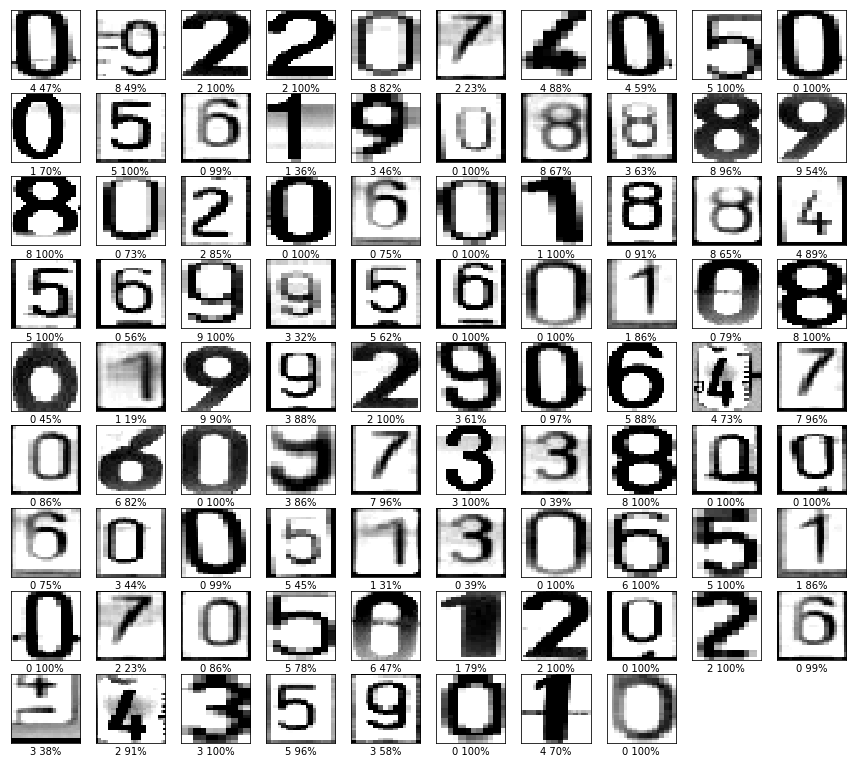

In [10]:
fpath = '/home/perizat/Рабочий стол/thesis/data set/output digits'
images = []
images_to_show = []
for dirpath, _, filenames in os.walk(fpath):
    for fl in filenames:
        my_img = cv2.imread(os.path.join(dirpath, fl), cv2.IMREAD_GRAYSCALE)
        my_test_img = np.reshape(cv2.imread(os.path.join(dirpath, fl), cv2.IMREAD_GRAYSCALE), (1, 28, 28, 1))
        images.append(my_test_img)
        images_to_show.append(my_img)

images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)

# print(filenames)
# print(classes)
plt.figure(figsize=(15,15))
for i in range(len(images)):
    print(filenames[i], classes[i])
    predictions_my = model.predict(images)
    plt.subplot(10,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_to_show[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}%".format(classes[i], 
                                    100*np.max(predictions_my[i])))

img9_1_3.png 8
img1_1_7.png 1
img12_1_2.png 2
img22_1_3.png 2
img10_1_5.png 0
img7_1_4.png 1
img21_1_2.png 8
img9_1_4.png 1
img10_1_6.png 5
img9_1_2.png 8
img22_1_0.png 3
img15_1_6.png 5
img8_1_2.png 8
img22_1_1.png 1
img21_1_6.png 9
img19_1_0.png 0
img6_1_1.png 8
img19_1_3.png 8
img12_1_5.png 8
img14_1_3.png 4
img22_1_5.png 8
img10_1_3.png 0
img15_1_5.png 2
img5_1_1.png 8
img7_1_6.png 6
img10_1_0.png 0
img9_1_6.png 1
img15_1_4.png 8
img6_1_3.png 8
img19_1_1.png 8
img15_1_1.png 5
img1_1_1.png 5
img10_1_4.png 9
img19_1_4.png 6
img1_1_2.png 5
img15_1_2.png 1
img8_1_5.png 0
img8_1_7.png 7
img14_1_1.png 4
img5_1_0.png 8
img14_1_5.png 0
img6_1_0.png 8
img14_1_6.png 9
img1_1_4.png 9
img12_1_4.png 2
img9_1_8.png 8
img9_1_1.png 0
img22_1_4.png 8
img5_1_4.png 8
img7_1_1.png 1
img7_1_0.png 8
img14_1_2.png 4
img14_1_4.png 0
img6_1_5.png 4
img8_1_1.png 1
img22_1_2.png 3
img7_1_3.png 8
img5_1_2.png 8
img15_1_0.png 0
img1_1_0.png 0
img8_1_6.png 6
img1_1_6.png 7
img9_1_7.png 0
img19_1_2.png 8
img6_1_

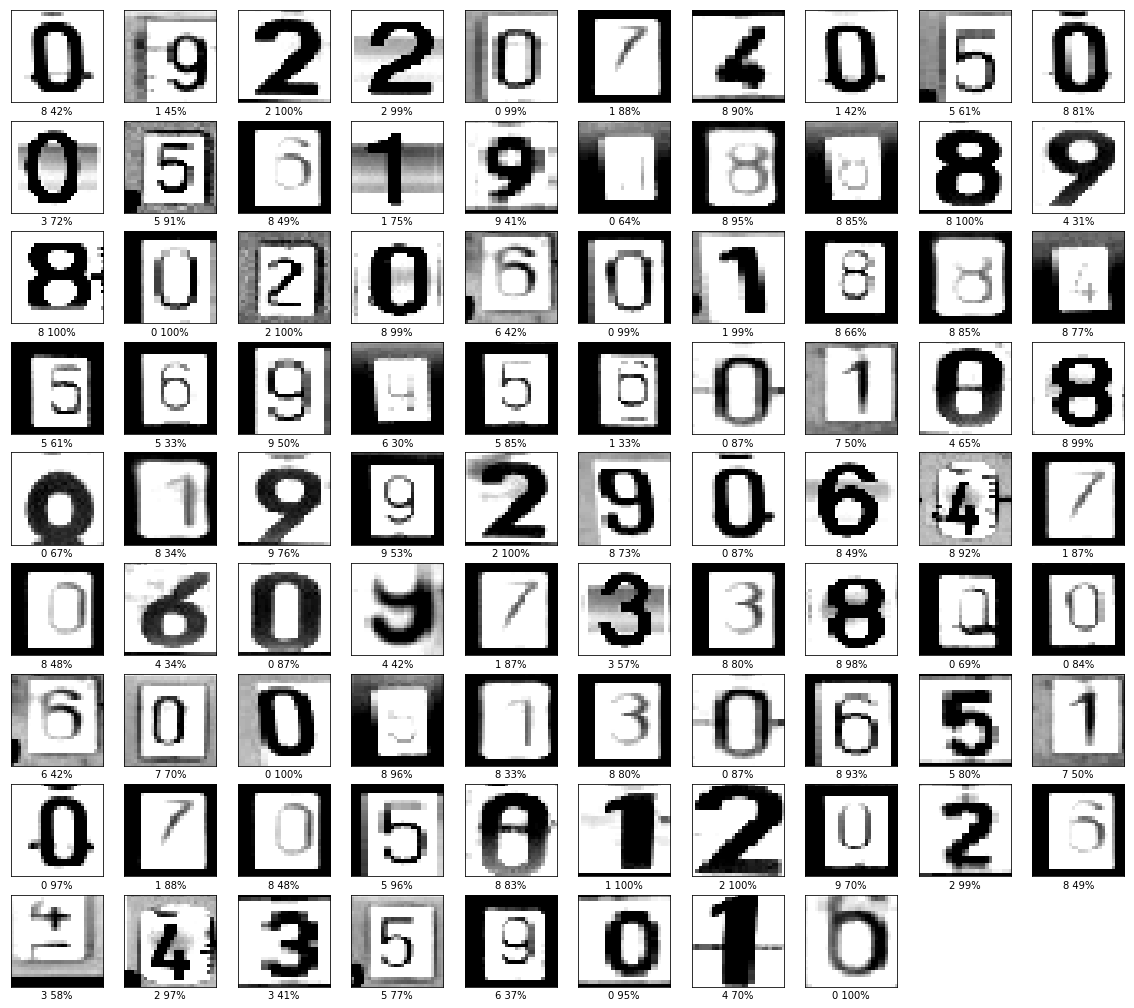

In [11]:
fpath = '/home/perizat/Рабочий стол/thesis/data set/digits_extend'
images = []
images_to_show = []
for dirpath, _, filenames in os.walk(fpath):
    for fl in filenames:
        my_img = cv2.imread(os.path.join(dirpath, fl), cv2.IMREAD_GRAYSCALE)
        my_test_img = np.reshape(cv2.imread(os.path.join(dirpath, fl), cv2.IMREAD_GRAYSCALE), (1, 28, 28, 1))
        images.append(my_test_img)
        images_to_show.append(my_img)

images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)

# print(filenames)
# print(classes)
plt.figure(figsize=(20,20))
for i in range(len(images)):
    print(filenames[i], classes[i])
    predictions_my1 = model.predict(images)
    plt.subplot(10,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_to_show[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}%".format(classes[i], 
                                    100*np.max(predictions_my1[i])))

img9_1_3.png 4
img1_1_7.png 0
img12_1_2.png 2
img22_1_3.png 2
img10_1_5.png 8
img7_1_4.png 2
img21_1_2.png 4
img9_1_4.png 1
img10_1_6.png 5
img9_1_2.png 0
img22_1_0.png 3
img15_1_6.png 5
img8_1_2.png 6
img22_1_1.png 1
img21_1_6.png 5
img19_1_0.png 0
img6_1_1.png 0
img19_1_3.png 7
img12_1_5.png 8
img14_1_3.png 9
img22_1_5.png 8
img10_1_3.png 0
img15_1_5.png 2
img5_1_1.png 0
img7_1_6.png 9
img10_1_0.png 0
img9_1_6.png 1
img15_1_4.png 6
img6_1_3.png 0
img19_1_1.png 8
img15_1_1.png 5
img1_1_1.png 0
img10_1_4.png 9
img19_1_4.png 1
img1_1_2.png 5
img15_1_2.png 9
img8_1_5.png 0
img8_1_7.png 2
img14_1_1.png 2
img5_1_0.png 8
img6_1_0.png 0
img14_1_6.png 4
img1_1_4.png 3
img12_1_4.png 2
img9_1_8.png 3
img9_1_1.png 0
img22_1_4.png 3
img5_1_4.png 4
img7_1_1.png 2
img7_1_0.png 0
img14_1_2.png 6
img14_1_4.png 0
img8_1_1.png 2
img22_1_2.png 3
img7_1_3.png 0
img5_1_2.png 8
img15_1_0.png 0
img1_1_0.png 0
img8_1_6.png 9
img1_1_6.png 1
img9_1_7.png 0
img19_1_2.png 6
img6_1_2.png 1
img8_1_3.png 0
img7_1_5

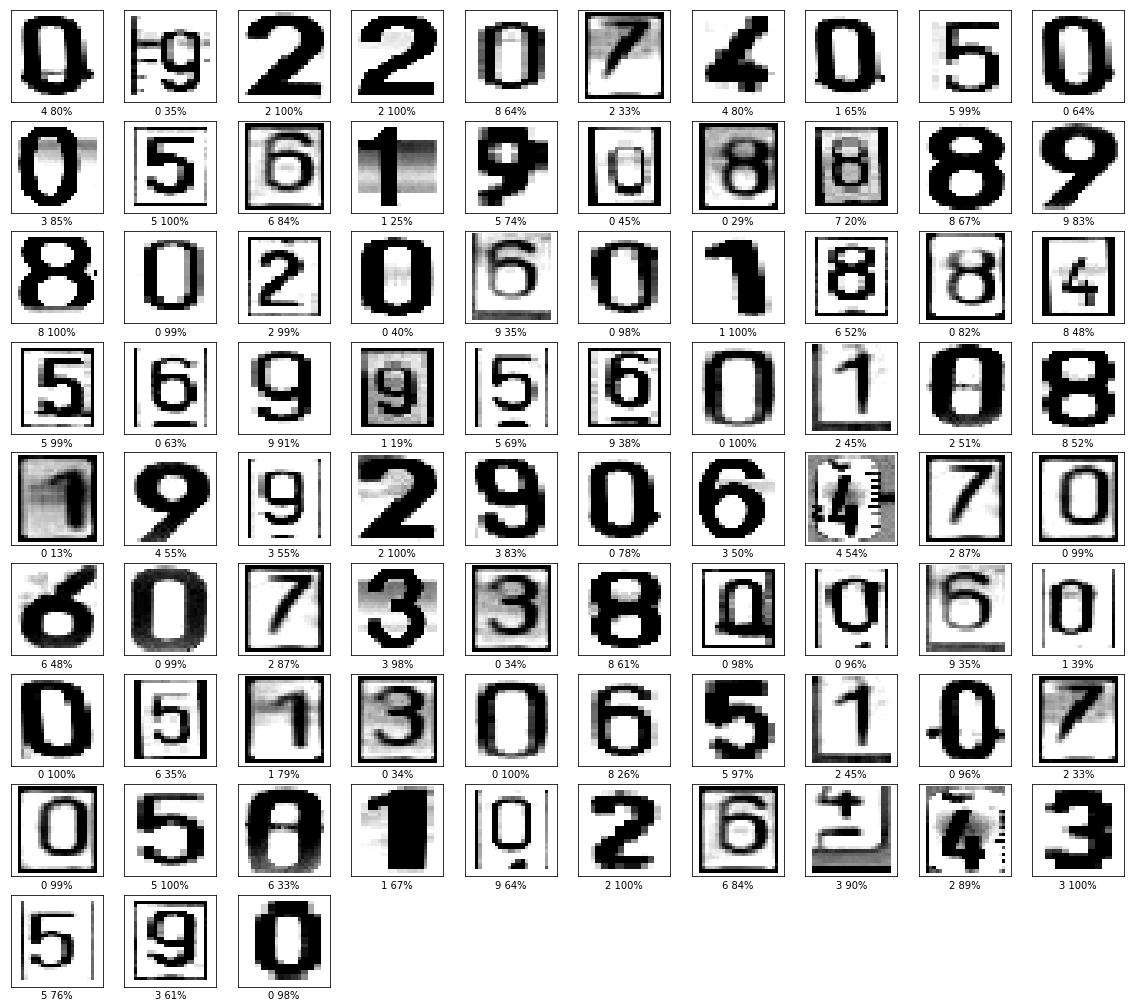

In [13]:
fpath = '/home/perizat/Рабочий стол/thesis/data set/digits_borders'
images = []
images_to_show = []
for dirpath, _, filenames in os.walk(fpath):
    for fl in filenames:
        my_img = cv2.imread(os.path.join(dirpath, fl), cv2.IMREAD_GRAYSCALE)
        my_test_img = np.reshape(cv2.imread(os.path.join(dirpath, fl), cv2.IMREAD_GRAYSCALE), (1, 28, 28, 1))
        images.append(my_test_img)
        images_to_show.append(my_img)

images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)

# print(filenames)
# print(classes)
plt.figure(figsize=(20,20))
for i in range(len(images)):
    print(filenames[i], classes[i])
    predictions_my1 = model.predict(images)
    plt.subplot(10,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_to_show[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}%".format(classes[i], 
                                    100*np.max(predictions_my1[i])))